In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('movie.csv')

In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.shape

(40000, 2)

In [5]:
# Read the CSV file

# Assuming 'text' is the name of the column containing the text you want to transform
# Preprocessing the text column
df['tokens'] = df['text'].apply(word_tokenize)

# Training the CBOW model
# Adjust the parameters according to your needs
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to transform text to vector
def text_to_vector(tokens):
    # Summing up the word vectors and dividing by the count of unique words to average them
    return np.mean([model.wv[token] for token in set(tokens)], axis=0)

# Applying the transformation to the text column
df['vector'] = df['tokens'].apply(text_to_vector)

# Displaying the DataFrame
print(df.head())


                                                text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                              tokens  \
0  [I, grew, up, (, b, ., 1965, ), watching, and,...   
1  [When, I, put, this, movie, in, my, DVD, playe...   
2  [Why, do, people, who, do, not, know, what, a,...   
3  [Even, though, I, have, great, interest, in, B...   
4  [Im, a, die, hard, Dads, Army, fan, and, nothi...   

                                              vector  
0  [-0.08008223, -0.12926331, 0.6898441, -0.30954...  
1  [0.20205419, -0.17567052, 0.65492344, -0.22867...  
2  [-0.058491267, -0.3871543, 0.61019623, -0.7013...  
3  [0.2479952, -0.22699246, 0.9007517, -0.5623758...  
4  [-0.05

In [6]:
df.drop(['tokens'], axis=1, inplace=True)

In [7]:
df.head()

,text,label,vector
0,I grew up (b. 1965) watching and loving the Th...,0,"[-0.08008223, -0.12926331, 0.6898441, -0.30954..."
1,"When I put this movie in my DVD player, and sa...",0,"[0.20205419, -0.17567052, 0.65492344, -0.22867..."
2,Why do people who do not know what a particula...,0,"[-0.058491267, -0.3871543, 0.61019623, -0.7013..."
3,Even though I have great interest in Biblical ...,0,"[0.2479952, -0.22699246, 0.9007517, -0.5623758..."
4,Im a die hard Dads Army fan and nothing will e...,1,"[-0.054901533, -0.021190196, 0.7013752, -0.435..."


In [8]:
X = np.array(df['vector'].to_list())

In [9]:
y = df['label']

In [10]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (34000, 100) (34000,)
Test set shape: (6000, 100) (6000,)


In [11]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_score = grid_search.best_score_
print("Best Score:", best_score)


y_pred = grid_search.predict(X_test)


c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Krishn

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8344705882352942


In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2982
           1       0.83      0.84      0.84      3018

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[2473  509]
 [ 474 2544]]


Confusion Matrix:
 [[2473  509]
 [ 474 2544]]


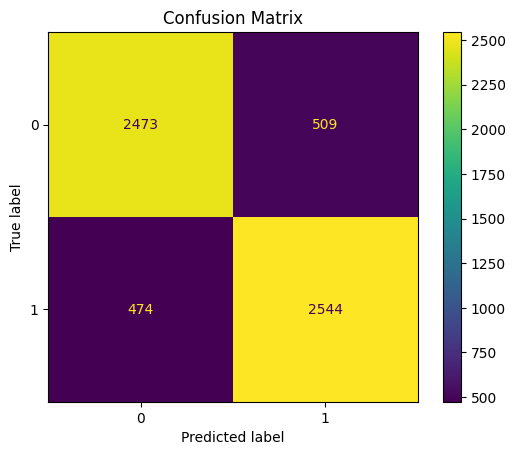

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

In [26]:
user_input = input("Enter a sentence for prediction: ")
    
tokens = word_tokenize(user_input)
    
vector = np.mean([model.wv[token] for token in set(tokens)], axis=0)
    
prediction = grid_search.predict([vector])[0]
if prediction == 0:
    prediction = 'Negative'
else:
    prediction = 'Positive'
    
    
print(f"The predicted label for '{user_input}' is: {prediction}")

The predicted label for 'the movie was so great i could die' is: Positive
